# DataCamp - Quantitative Risk Management in Python

Managing risk using Quantitative Risk Management is a vital task across the banking, insurance, and asset management industries. It’s essential that financial risk analysts, regulators, and actuaries can quantitatively balance rewards against their exposure to risk.


This course introduces you to financial portfolio risk management through an examination of the 2007—2008 financial crisis and its effect on investment banks such as Goldman Sachs and J.P. Morgan. You’ll learn how to use Python to calculate and mitigate risk exposure using the Value at Risk and Conditional Value at Risk measures, estimate risk with techniques like Monte Carlo simulation, and use cutting-edge  technologies such as neural networks to conduct real time portfolio rebalancing.

In [4]:
# load data folder
data_folder = "/Users/miguelbaptista/Library/CloudStorage/OneDrive-Personal/Data_Science/Python/MOOC/DataCamp/ficheiros_2/"

In [264]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 1) Risk and return recap
import math
import random
from decimal import Decimal, getcontext
import statsmodels.api as sm
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt import CLA

# 2) Goal-oriented risk management
from scipy.stats import norm





# 0) Load files

In [7]:
# function to retrieve video slides
def show_video_slides(images=[], left=0, bottom=-1, right=1.8, top=1, wspace=0, hspace=0):
    # show video slides
    n_images = len(images)
    f = plt.figure()
    for ind, i in enumerate(images):
        f.add_subplot(1, n_images, ind+1)
        imagem = plt.imread(data_folder + "{}.png".format(i))
        plt.imshow(imagem)
        plt.axis('off')

    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show(block=True) 


In [8]:
# load course files
mortgage_delinquency = pd.read_csv(data_folder + "mortgage_delinquency.csv")
crisis_portfolio = pd.read_csv(data_folder + "crisis_portfolio.csv")
ge_historical = pd.read_csv(data_folder + "GE - Historical.csv")
ibm_historical_quotes = pd.read_csv(data_folder + "IBM - HistoricalQuotes.csv")


Check Data

In [10]:
# mortgage_delinquency
print(mortgage_delinquency.shape)
mortgage_delinquency.head()

(24, 2)


,Date,Mortgage Delinquency Rate
0,2005-03-31,0.0155
1,2005-06-30,0.0159
2,2005-09-30,0.0163
3,2005-12-31,0.0161
4,2006-03-31,0.0162


In [11]:
# crisis_portfolio
print(crisis_portfolio.shape)
crisis_portfolio.head()

(1511, 5)


,Date,Citibank,Morgan Stanley,Goldman Sachs,J.P. Morgan
0,31/12/2004,481.799988,55.520000,104.040001,39.009998
1,03/01/2005,482.700012,55.900002,104.949997,39.150002
2,04/01/2005,478.600006,55.299999,104.269997,38.410000
3,05/01/2005,484.600006,54.980000,103.800003,38.490002
4,06/01/2005,489.299988,56.279999,105.230003,38.709999


In [12]:
# ge_historical
print(ge_historical.shape)
ge_historical.head()

(755, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-01-03,35.971153,36.682693,35.942307,36.509617,23.483156,44951700
1,2007-01-04,36.509617,36.538460,36.009617,36.298077,23.347090,32540300
2,2007-01-05,36.125000,36.307693,35.875000,36.115383,23.229588,28108200
3,2007-01-08,36.009617,36.221153,35.817307,36.105770,23.223402,24662200
4,2007-01-09,36.326923,36.528847,35.923077,36.105770,23.223402,25581200


In [13]:
# ibm_historical_quotes
print(ibm_historical_quotes.shape)
ibm_historical_quotes.head()

(1259, 6)


,date,close,volume,open,high,low
0,23/08/2019,129.57,4818759,133.63,134.26,128.83
1,22/08/2019,134.32,2695009,134.69,135.68,133.81
2,21/08/2019,134.25,2806774,134.96,135.94,133.80
3,20/08/2019,133.00,3018934,135.24,135.28,132.81
4,19/08/2019,135.04,3165436,134.88,136.33,134.88


# 1) Risk and return recap

Risk management begins with an understanding of risk and return. We’ll recap how risk and return are related to each other, identify risk factors, and use them to re-acquaint ourselves with Modern Portfolio Theory applied to the global financial crisis of 2007-2008.

## 1.0) Welcome

In [17]:
# vídeo

# Portfolio return

# .pct_change() method
df_pct_change = pd.concat([ibm_historical_quotes["close"], 
                ibm_historical_quotes["close"].pct_change()], 
                axis=1, keys=['ibm_close', 'ibm_pct_change'])

# .pct_change() column
display(df_pct_change)

# check
print(round(df_pct_change["ibm_close"].iloc[1]/df_pct_change["ibm_close"].iloc[0] - 1, 6))

,ibm_close,ibm_pct_change
0,129.57,NaN
1,134.32,0.036660
2,134.25,-0.000521
3,133.00,-0.009311
4,135.04,0.015338
...,...,...
1254,192.30,0.003863
1255,192.00,-0.001560
1256,192.25,0.001302
1257,192.99,0.003849


0.03666


In [18]:
######################################################

In [19]:
%%time

# .dot() method (to be continued)

# create weights
N_range = range(df_pct_change.shape[0] - 2)
weights = []
for ind, i in enumerate(N_range):
    random_number = round(random.uniform(0, 0.05), 2)
    if sum(weights) + random_number < 1:
        weights.append(random_number) 
    else:
        weights.append(0)

last_weight = round(1 - sum(weights), 2)
weights.append(last_weight)

print("Round sum (due to the floating-point precision issue in Python):", round(sum(weights), 2))

Round sum (due to the floating-point precision issue in Python): 1.0
CPU times: user 4.91 ms, sys: 235 µs, total: 5.15 ms
Wall time: 5.06 ms


In Python, floating-point numbers are represented using the IEEE 754 standard, which is the industry norm for binary floating-point arithmetic. While this system allows us to work with a wide range of values, it comes with a limitation: finite precision.

**Why Does This Happen?**

**Floating-point numbers** have a **limited number of bits to store values**. As computations grow, especially when dealing with very small or very large numbers, the system has to round off values to fit within this finite space. When many small floating-point operations (like additions) are performed, these rounding errors can accumulate, leading to small but noticeable differences in the results.

The difference in an example like ("0.68509718137420**38**" vs "0.68509718137420**46**") is insignificant in most cases, but in high-precision applications, even this small error might matter.

In [21]:
# floating-point precision issue 
print(sum(weights) == 1, ":", sum(weights))
print(round(sum(weights), 2) == 1)

# math.isclose()
print(math.isclose(sum(weights), 1, rel_tol=1e-9))

False : 1.0000000000000004
True
True


In [22]:
print(0.1+0.1)
print(0.1+0.2) # != 0.3

0.2
0.30000000000000004


**Using the `decimal` Module for Higher Precision** (takes more time though)

In [24]:
from decimal import Decimal, getcontext

In [25]:
%%time

getcontext().prec = 4  # Set precision
weights_decimal = [Decimal(str(w)) for w in weights]
print(sum(weights_decimal))  # Clean 1

1.00
CPU times: user 408 µs, sys: 116 µs, total: 524 µs
Wall time: 836 µs


In [26]:
# output Decimal
weights_decimal[0]

Decimal('0.0')

In [27]:
######################################################

In [28]:
# .dot() method

# Quantifying return
price_pct_changes = np.array(df_pct_change["ibm_pct_change"].tolist()[1:]) # first was NaN

returns = price_pct_changes.dot(weights)
print("Portfolio return:", returns)


Portfolio return: 0.0010463219707049901


In [29]:
# small difference 
print(sum([i[0]*i[1] for i in list(zip(price_pct_changes, weights))]))
print(returns) # higher precision

0.0010463219707049908
0.0010463219707049901


- `price_pct_changes.dot(weights)` uses NumPy (arrays or matrix multiplication) or Pandas (between dataframes or Series) under the hood, which often handles floating point numbers using higher internal precision (e.g. float64).

- `sum([i[0]*i[1] for i in zip(price_pct_changes, weights)])` is plain Python, and might use slightly less precision in intermediate steps — especially if your weights were floats rounded to two decimals.

In [31]:
# function to generate weights
def generate_weights(df, limit_weight=0.05):
    # create weights
    N_range = range(df.shape[0] - 2)
    weights = []
    for ind, i in enumerate(N_range):
        random_number = round(random.uniform(0, limit_weight), 2)
        if sum(weights) + random_number < 1:
            weights.append(random_number) 
        else:
            weights.append(0)
    
    last_weight = round(1 - sum(weights), 2)
    weights.append(last_weight)

    return weights

# function to generate pct change
def generate_pct_change(df, column):
    pct_changes = df[column].pct_change()
    return pct_changes

# function to generate returns
def generate_returns(df, column, weights):
    pct_changes = generate_pct_change(df=df, column=column)
    price_pct_changes = np.array(pct_changes.tolist()[1:]) # first was NaN
    returns = price_pct_changes.dot(weights)
    return returns

# final example
generate_returns(df=df_pct_change, column="ibm_close", weights=generate_weights(df_pct_change))   

0.004834972255064271

In [32]:
# Quantifying risk

# Portfolio return volatility == risk
# Calculate volatility via covariance matrix
# Use .cov() DataFrame method of returns and annualize
# Remember that 
#   - the diagonal of covariance represents the individual asset variances
#   - off-diagonals of covariance are covariance between assets


#############
# create portfolio
assets = crisis_portfolio[['Citibank', 'Morgan Stanley', 'Goldman Sachs', 'J.P. Morgan']].copy()
for i in assets.columns:
    returns_column_name = (i + "_pct_change").lower()
    assets[returns_column_name] = generate_pct_change(df=assets, column=i)   
#############


# Compute covariance
portfolio_returns = assets[assets.columns[4:]]
covariance = portfolio_returns.cov()*252
display(covariance)


,citibank_pct_change,morgan stanley_pct_change,goldman sachs_pct_change,j.p. morgan_pct_change
citibank_pct_change,0.536214,0.305045,0.217993,0.269784
morgan stanley_pct_change,0.305045,0.491993,0.258625,0.218310
goldman sachs_pct_change,0.217993,0.258625,0.217686,0.170937
j.p. morgan_pct_change,0.269784,0.218310,0.170937,0.264315


In [33]:
# Portfolio risk

# depends upon asset weights in portfolio
# Portfolio variance is (see definition) - quadratic function

weights_portfolio = [0.25, 0.25, 0.25, 0.25]

# Matrix multiplication can be computed using the "@" operator in Python
portfolio_variance = np.transpose(weights_portfolio) @ covariance @ weights_portfolio
portfolio_variance

0.2744748529001969

In [34]:
##################

In [35]:
# Check
covariance @ weights_portfolio

citibank_pct_change          0.332259
morgan stanley_pct_change    0.318493
goldman sachs_pct_change     0.216310
j.p. morgan_pct_change       0.230837
dtype: float64

In [36]:
# check variance
sum(covariance @ weights_portfolio) * 0.25

0.27447485290019696

In [37]:
# Calculate the contribution of Citibank to portfolio variance by multiplying its covariance with its weight in the portfolio
# This is one component of the total portfolio variance calculation
display(covariance["citibank_pct_change"] * weights_portfolio[0])

# sum
print("\n", sum(covariance["citibank_pct_change"] * weights_portfolio[0]))

citibank_pct_change          0.134054
morgan stanley_pct_change    0.076261
goldman sachs_pct_change     0.054498
j.p. morgan_pct_change       0.067446
Name: citibank_pct_change, dtype: float64


 0.3322592331422445


In [38]:
##################

In [39]:
# Calculate the portfolio volatility by taking the square root of the portfolio variance
portfolio_volatility = np.sqrt(portfolio_variance)
portfolio_volatility

0.5239034767017651

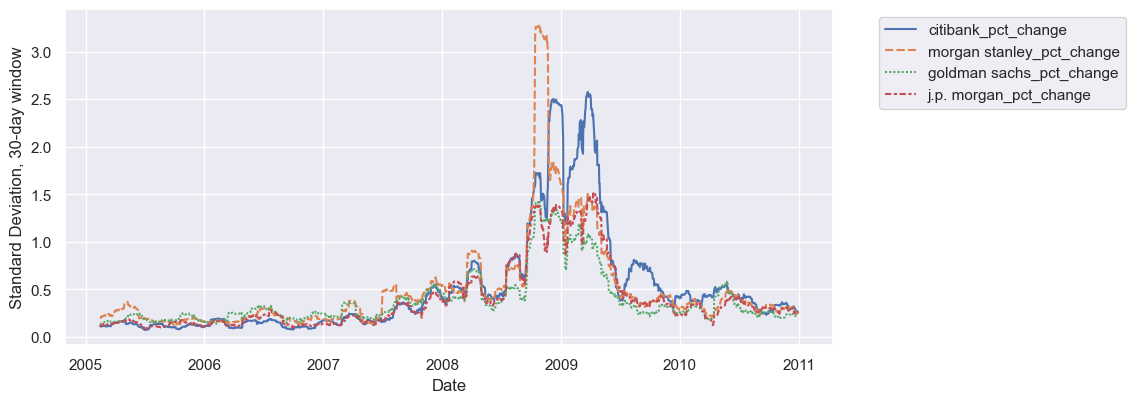

In [40]:
# Volatility time series

# --> It can be useful to calculate portfolio volatility over time

# Use a 'window' to compute volatility over a fixed time period (e.g. week, 30-day 'month')
# Observe volatility trend and possible extreme events

portfolio_returns.index = pd.to_datetime(crisis_portfolio["Date"], dayfirst=True)
portfolio_returns

windowed = portfolio_returns.rolling(30)
volatility = windowed.std()*np.sqrt(252)

# plot
sns.lineplot(volatility)

plt.ylabel("Standard Deviation, 30-day window")
plt.subplots_adjust(left=0, bottom=0, right=1.2, top=0.7, wspace=0, hspace=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

### Portfolio returns during the crisis

In [42]:
# load course files - FOR EXERCISES
portfolio = pd.read_csv(data_folder + "crisis_portfolio.csv", index_col=0)
portfolio.head()

,Citibank,Morgan Stanley,Goldman Sachs,J.P. Morgan
Date,,,,
31/12/2004,481.799988,55.520000,104.040001,39.009998
03/01/2005,482.700012,55.900002,104.949997,39.150002
04/01/2005,478.600006,55.299999,104.269997,38.410000
05/01/2005,484.600006,54.980000,103.800003,38.490002
06/01/2005,489.299988,56.279999,105.230003,38.709999


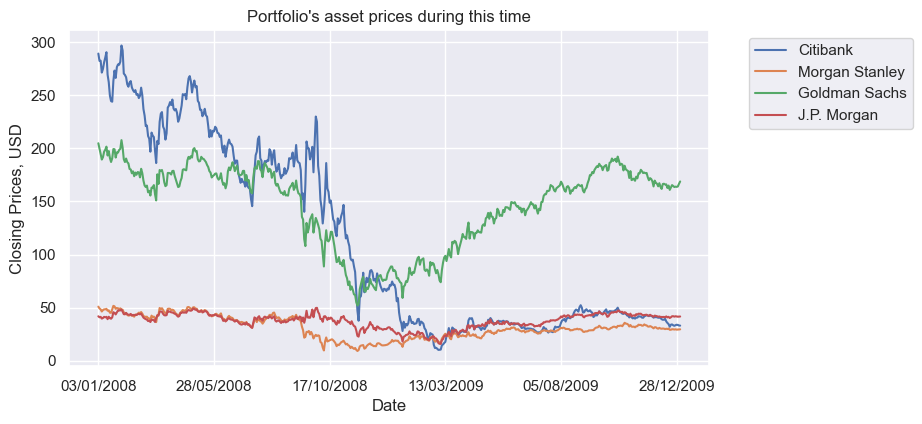

In [43]:
# Select portfolio asset prices for the middle of the crisis, 2008-2009
asset_prices = portfolio.loc['03/01/2008':'31/12/2009']

# Plot portfolio's asset prices during this time
asset_prices.plot().set_ylabel("Closing Prices, USD")

plt.title("Portfolio's asset prices during this time")
plt.subplots_adjust(left=0, bottom=0, right=1, top=0.7, wspace=0, hspace=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

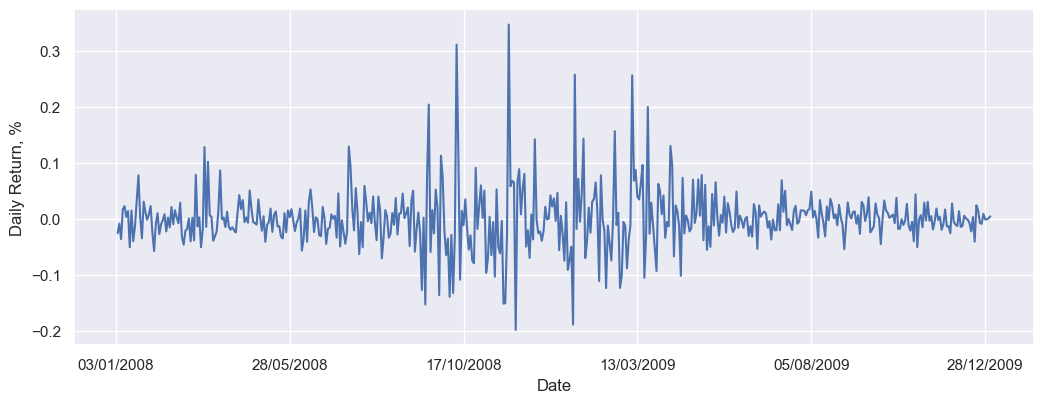

In [358]:
# Compute the portfolio's daily returns
asset_returns = asset_prices.pct_change()

weights = [0.25, 0.25, 0.25, 0.25]

portfolio_returns = asset_returns.dot(weights)

# Plot portfolio returns
portfolio_returns.plot().set_ylabel("Daily Return, %")

plt.subplots_adjust(left=0, bottom=0, right=1.5, top=0.7, wspace=0, hspace=0)
plt.show()

In [360]:
portfolio_returns

Date
03/01/2008         NaN
04/01/2008   -0.025675
07/01/2008   -0.008841
08/01/2008   -0.036424
09/01/2008    0.016885
                ...   
24/12/2009    0.008679
28/12/2009   -0.000968
29/12/2009   -0.001109
30/12/2009    0.000972
31/12/2009    0.004232
Length: 504, dtype: float64

The asset prices plot shows how the global financial crisis created a loss in confidence in investment banks from September 2008. **There was an event during September that precipitated this decline**, and you'll examine this shortly. **The 'spikiness' of portfolio returns indicates how uncertain and volatile asset returns became**. You'll quantify this volatility using the same dataset in the next exercise.

### Asset covariance and portfolio volatility

In [47]:
# pct_changes()
display(asset_returns.head())
display(portfolio_returns)

,Citibank,Morgan Stanley,Goldman Sachs,J.P. Morgan
Date,,,,
03/01/2008,NaN,NaN,NaN,NaN
04/01/2008,-0.023851,-0.032195,-0.023970,-0.022684
07/01/2008,0.000708,-0.020081,-0.026009,0.010017
08/01/2008,-0.039632,-0.039536,-0.026858,-0.039671
09/01/2008,0.012896,0.028664,0.011873,0.014106


Date
03/01/2008         NaN
04/01/2008   -0.025675
07/01/2008   -0.008841
08/01/2008   -0.036424
09/01/2008    0.016885
                ...   
24/12/2009    0.008679
28/12/2009   -0.000968
29/12/2009   -0.001109
30/12/2009    0.000972
31/12/2009    0.004232
Length: 504, dtype: float64

In [48]:
# Generate the covariance matrix from portfolio asset's returns
covariance = asset_returns.cov()

# Annualize the covariance using 252 trading days per year
covariance = covariance * 252

# Display the covariance matrix
display(covariance)

,Citibank,Morgan Stanley,Goldman Sachs,J.P. Morgan
Citibank,1.478132,0.823345,0.574945,0.726090
Morgan Stanley,0.823345,1.300926,0.660197,0.561633
Goldman Sachs,0.574945,0.660197,0.501708,0.427773
J.P. Morgan,0.726090,0.561633,0.427773,0.686916


**Question**
  
Which portfolio asset has the highest annualized volatility over the time period 2008 - 2009?

- Citibank

In [50]:
# Compute and display portfolio volatility for 2008 - 2009
portfolio_variance = np.transpose(weights) @ covariance @ weights

portfolio_volatility = np.sqrt(portfolio_variance)
print(portfolio_volatility)

0.8483678596449427


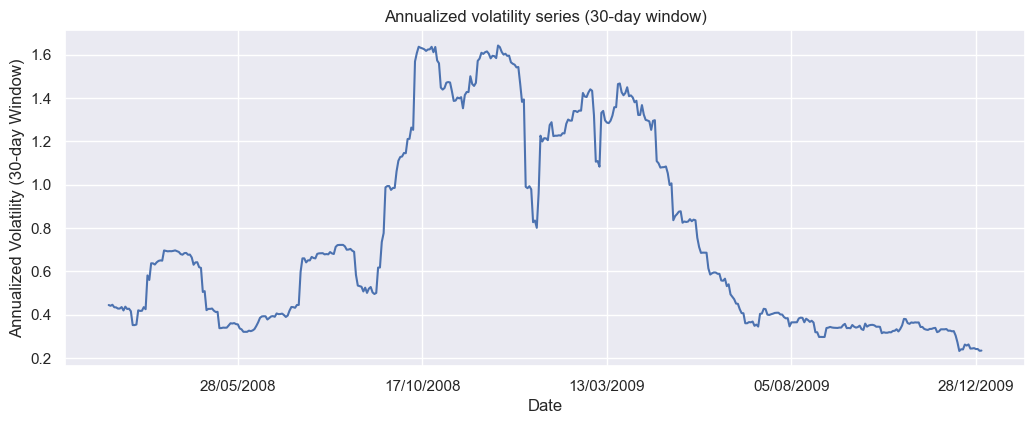

In [51]:
# Calculate the 30-day rolling window of standard deviation
rolling_std = portfolio_returns.rolling(window=30).std(ddof=1) # sample std

# Compute the annualized volatility series
volatility_series = rolling_std * np.sqrt(252)

# Plot the portfolio volatility
volatility_series.plot().set_ylabel("Annualized Volatility (30-day Window)")

plt.title("Annualized volatility series (30-day window)")
plt.subplots_adjust(left=0, bottom=0, right=1.5, top=0.7, wspace=0, hspace=0)
plt.show()

Citibank exhibited the highest volatility during the crisis period, with Morgan Stanley not far behind. The volatility plot shows that an equal-weighted portfolio of all four banks demonstrated a significant increase in volatility from late September 2008, which is around the time the 4th-largest investment bank in the world, Lehman Brothers, went bankrupt. **Its bankruptcy was largely due to mismanagement of the risks associated with its holdings of mortgage-backed securities**.

In [53]:
# by the way, (Bessel's correction), NumPy assumes n (population, ddof=0) by default
print(round(portfolio_returns.std(ddof=0), 5))  # population std (default)
print(round(portfolio_returns.std(ddof=1), 5))  # sample std 

0.05339
0.05344


## 1.2) Risk factors and the financial crisis

In [55]:
# vídeo

**Risk factors**

- Volatility: measure of dispersion of returns around expected value
- Time series: expected value = sample average
- What drives expectation and dispersion?
- *Risk factors*: variables or events driving portfolio returns and volatility


**Risk exposure**

- *Risk exposure*: measure of possible portfolio loss 
   - Risk factors determine risk exposure
- Example: Flood insurance
   - Deductible (franquia): out-of-pocket payment regardless of loss
   - 100% coverage still leaves deductible to be paid
   - So the *deductible* is the risk exposure (franquia)
   - Frequent flooding => more volatile flood outcome
   - Frequent flooding => higher risk exposure


**Systematic risk**

- *Systematic risk*: risk factor(s) affecting volatility of all portfolio assets
   - *Market risk*: systematic risk from general financial market movements
   - Airplane engine failure!: an analogy for the systematic risk - it affects everyone in the plane
- Examples of financial systematic risk factors:
   - Price level changes, i.e., inflation/deflation
   - Interest rate changes
   - Economic climate changes


**Idiosyncratic risk**

- *Idiosyncratic risk*: risk specific to a particular asset/asset class
   - Turbulence and the unfastened seatbelt!: an analogy for the idiosyncratic risk
- Examples of idiosyncratic risk:
   - Bond portfolio: issuer risk of default
   - Firm/sector characteristics
      - Firm size (market capitalization)
      - Book-to-market ratio
      - Sector shocks


**Factor models**

- *Factor model*: assessment of risk factors affecting portfolio return
- Statistical regression, e.g. - Ordinary Least Squares (OLS):
  - dependent variable: returns (or volatility)
  - independent variable(s): systemic and/or idiosyncratic risk factors
- *Fama-French* factor model: a combination of
  - market risk
  - idiosyncratic [risk firm size (market cap) + firm value (Book-to-market ratio)]


**Crisis risk factor: mortgage-backed securities**

- Investment banks: borrowed heavily just before the crisis
- Collateral: mortgage-backed securities (MBS)
- MBS: supposed to diversify risk by holding many mortgages of different characteristics
  - **Flaw**: the mortgage default risk was in fact **highly correlated**.
  - Avalanche of delinquencies/default destroyed collateral value.
  - We can model MBS as a risk factor:
    - **90-day mortgage delinquency** -> risk factor
   


**Crisis risk factor model**

- Factor model regression: portfolio returns vs mortgage delinquency
- Import `statsmodel.api` library for regression tools.
- Fit regression using `.OLS()` object and its `.fit()`
- Display results using regression's `.summary()`method


<br>


In [57]:
%%script false --no-raise-error

import statsmodels.api as sm

# Fit regression
regression = sm.OLS(portf_returns, delinquencies).fit()
print(regression.summary())

### Frequency resampling primer

Risk factor models often rely upon data that is of **different frequencies**. A typical example is when using *quarterly macroeconomic data*, such as prices, unemployment rates, etc., with financial data, which is often daily (or even intra-daily). *To use both data sources in the same model, higher frequency data needs to be resampled to match the lower frequency data*.

The DataFrame and Series Pandas objects have a built-in `.resample()` method that specifies the *lower frequency*. This method is chained with a method to create the lower-frequency statistic, such as .mean() for the average of the data within the new frequency period, or .min() for the minimum of the data.

In this exercise you'll practice converting daily returns data to weekly and quarterly frequency.

In [60]:
# compute returns
portfolio_returns_2 = pd.DataFrame(assets[assets.columns[4:]].dot([0.25, 0.25, 0.25, 0.25]), columns=["portfolio_pct_change"])
portfolio_returns_2.index = pd.to_datetime(crisis_portfolio["Date"], dayfirst=True)
print(portfolio_returns_2.head())

            portfolio_pct_change
Date                            
2004-12-31                   NaN
2005-01-03              0.005262
2005-01-04             -0.011152
2005-01-05              0.001081
2005-01-06              0.013209


In [61]:
# Convert daily returns to quarterly average returns
returns_q = portfolio_returns_2.resample('QE').mean()

# Examine the beginning of the quarterly series
display(returns_q.head())

#######

# Now convert daily returns to weekly minimum returns
returns_w = portfolio_returns_2.resample('W').min()

# Examine the beginning of the weekly series
display(returns_w.head())

,portfolio_pct_change
Date,
2004-12-31,NaN
2005-03-31,-0.000367
2005-06-30,-0.000366
2005-09-30,0.000615
2005-12-31,0.001323


,portfolio_pct_change
Date,
2005-01-02,NaN
2005-01-09,-0.011152
2005-01-16,-0.007643
2005-01-23,-0.011076
2005-01-30,-0.000443


### Visualizing risk factor correlation


Investment banks heavily invested in mortgage-backed securities (MBS) before and during the financial crisis. This makes MBS a likely risk factor for the investment bank portfolio. You'll assess this using scatterplots between portfolio returns and an MBS risk measure, the 90-day mortgage delinquency rate mort_del.

mort_del is only available as quarterly data. So portfolio_returns first needs to be transformed from daily to quarterly frequency using the DataFrame .resample() method.

*(Your workspace contains both portfolio_returns for an equal-weighted portfolio and the delinquency rate mort_del variable. For the scatterplots, plot_average and plot_min are plot axes in your workspace--you'll add your scatterplots to them using the .scatter() method.)*

In [64]:
# load course files
mort_del = pd.read_csv(data_folder + "mortgage_delinquency.csv", parse_dates=["Date"], index_col=0) # quarterly data
mort_del.shape

(24, 1)

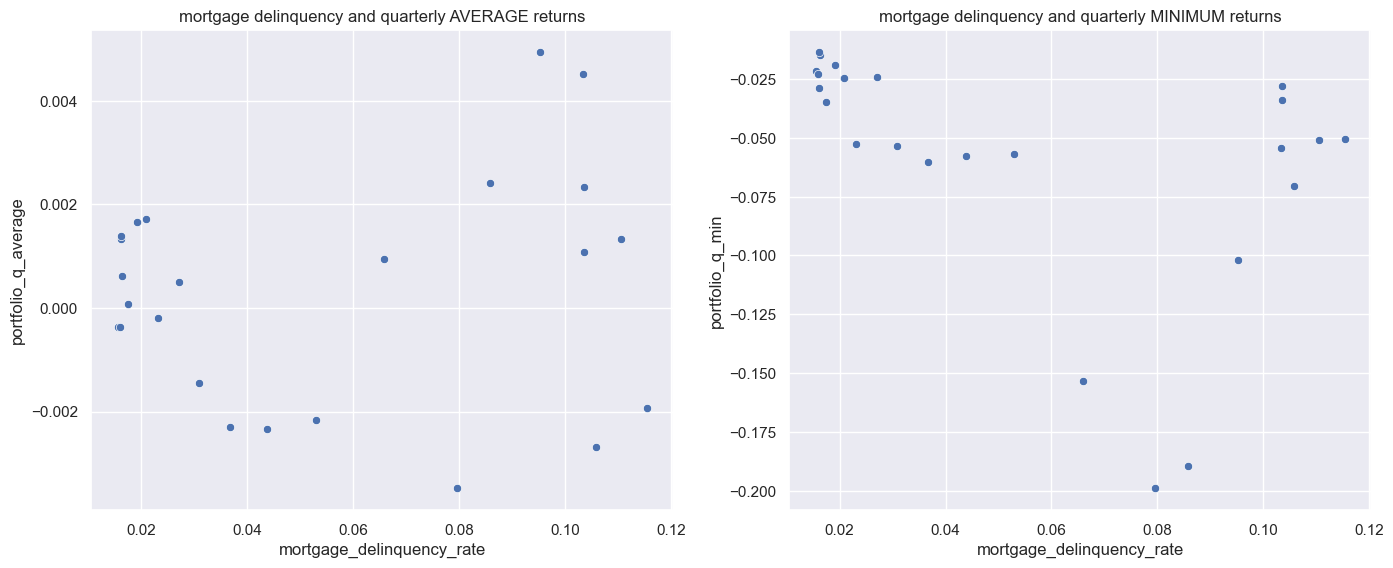

In [65]:
# Transform the daily portfolio_returns into quarterly average returns
portfolio_q_average = portfolio_returns_2.resample('QE').mean().dropna()

# merge dataframes (same index)
portqaverage_mortdel = pd.merge(mort_del, portfolio_q_average, left_index=True, right_index=True)
portqaverage_mortdel.columns = ["mortgage_delinquency_rate", "portfolio_q_average"]

# Create a scatterplot between delinquency and quarterly average returns
plt.subplot(1, 2, 1)
sns.scatterplot(data=portqaverage_mortdel, x="mortgage_delinquency_rate", y="portfolio_q_average")
plt.title("mortgage delinquency and quarterly AVERAGE returns")

#########

# Transform daily portfolio_returns returns into quarterly minimum returns
portfolio_q_min = portfolio_returns_2.resample('QE').min().dropna()

# merge dataframes (same index)
portqmin_mortdel = pd.merge(mort_del, portfolio_q_min, left_index=True, right_index=True)
portqmin_mortdel.columns = ["mortgage_delinquency_rate", "portfolio_q_min"]

# Create a scatterplot between delinquency and quarterly minimum returns
plt.subplot(1, 2, 2)
sns.scatterplot(data=portqmin_mortdel, x="mortgage_delinquency_rate", y="portfolio_q_min")
plt.title("mortgage delinquency and quarterly MINIMUM returns")

plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0.2, hspace=0.4)
plt.show()

Your initial assessment indicates that there is **little correlation between average returns and mortgage delinquencies**, but a **stronger negative correlation exists between _minimum_ returns and delinquency**. In the following exercises you'll quantify this using least-squares regression.

### Least-squares factor model

In [68]:
# sns.regplot(data=portqmin_mortdel, x="mortgage_delinquency_rate", y="portfolio_q_min")
# plt.show()

As you've seen, there is a **negative correlation between minimum quarterly returns and mortgage delinquency rates** from 2005 - 2010. This can be made more precise with an OLS regression factor model.

You'll compare three factor models with three different quarterly dependent variables: **average returns**, **minimum returns**, and **average volatility**. The independent variable is the mortgage delinquency rate. In the regression summary, examine the coefficients' t-statistic for statistical significance, as well as the overall R-squared for goodness of fit.

In [70]:
import statsmodels.api as sm

**Regress portfolio average returns**

In [72]:
# Add a constant to the regression
mort_del = sm.add_constant(mort_del)

# Create the regression factor model and fit it to the data
results = sm.OLS(portfolio_q_average, mort_del).fit()

# Print a summary of the results
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     portfolio_pct_change   R-squared:                       0.021
Model:                              OLS   Adj. R-squared:                 -0.023
Method:                   Least Squares   F-statistic:                    0.4801
Date:                  Sun, 03 Aug 2025   Prob (F-statistic):              0.496
Time:                          18:26:45   Log-Likelihood:                 113.89
No. Observations:                    24   AIC:                            -223.8
Df Residuals:                        22   BIC:                            -221.4
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

**Regress portfolio minimum returns**

In [74]:
# Add a constant to the regression
mort_del = sm.add_constant(mort_del)

# Create the regression factor model and fit it to the data
results = sm.OLS(portfolio_q_min, mort_del).fit()

# Print a summary of the results
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     portfolio_pct_change   R-squared:                       0.178
Model:                              OLS   Adj. R-squared:                  0.141
Method:                   Least Squares   F-statistic:                     4.761
Date:                  Sun, 03 Aug 2025   Prob (F-statistic):             0.0401
Time:                          18:26:45   Log-Likelihood:                 39.937
No. Observations:                    24   AIC:                            -75.87
Df Residuals:                        22   BIC:                            -73.52
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

**Regress portfolio average volatility**

In [76]:
# Compute average volatility
vol_q_mean = round(portfolio_returns_2.rolling(30).std().resample('QE').mean().dropna(), 3)

# Add a constant to the regression
mort_del = sm.add_constant(mort_del)

# Create the regression factor model and fit it to the data
results = sm.OLS(vol_q_mean, mort_del).fit()

# Print a summary of the results
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     portfolio_pct_change   R-squared:                       0.191
Model:                              OLS   Adj. R-squared:                  0.154
Method:                   Least Squares   F-statistic:                     5.190
Date:                  Sun, 03 Aug 2025   Prob (F-statistic):             0.0328
Time:                          18:26:45   Log-Likelihood:                 60.028
No. Observations:                    24   AIC:                            -116.1
Df Residuals:                        22   BIC:                            -113.7
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

As seen from the regressions, **mortgage delinquencies are acting as a systematic risk factor** for both **minimum quarterly returns** and **average volatility of returns**, but **_not_ for average quarterly returns**. The R-squared goodness of fit isn't high in any case, but a model with more factors would likely generate greater explanatory power.

## 1.3) Modern Portfolio Theory

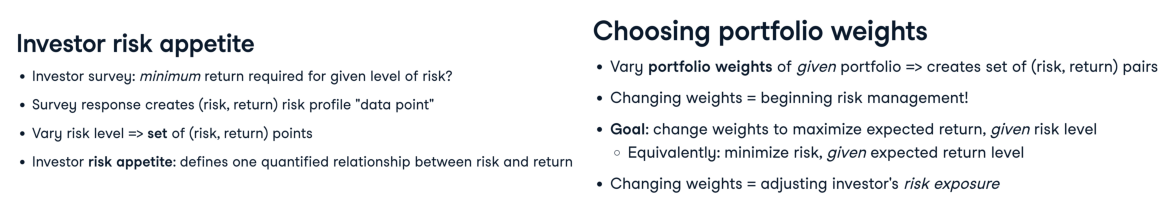

In [79]:
show_video_slides(images=["investor_risk_appetite", "choosing_portfolio_weights"])

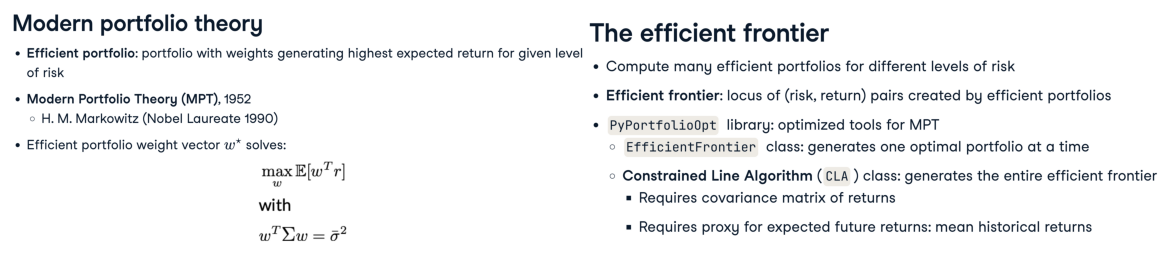

In [80]:
show_video_slides(images=["MPT", "efficient_frontier"])

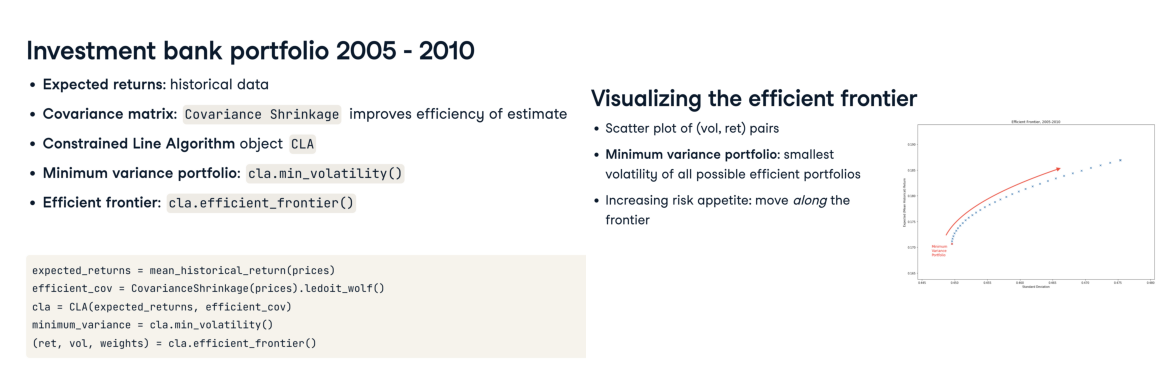

In [81]:
show_video_slides(images=["investment_bank_portfolio", "visualizing_efficient_frontier"])

### Practice with PyPortfolioOpt: Geometric mean returns

Modern Portfolio Theory is the cornerstone of portfolio risk management, because the efficient frontier is a standard method of assessing both investor risk appetite and market risk-return tradeoffs. In this exercise you'll develop powerful tools to explore a portfolio's efficient frontier, using the PyPortfolioOpt pypfopt Python library.

To compute the efficient frontier, both expected returns and the covariance matrix of the portfolio are required.

After some practice loading the investment bank price data, you'll use `pypfopt.expected_returns`'s `mean_historical_return` method to compute and visualize the annualized average returns of each bank from daily asset prices. The following exercise will then cover the covariance matrix.

In [84]:
# Load the investment portfolio price data into the price variable.
prices = pd.read_csv(data_folder + "crisis_portfolio.csv")

# Convert the 'Date' column to a datetime index
prices['Date'] = pd.to_datetime(prices['Date'], format='%d/%m/%Y')
prices.set_index(['Date'], inplace=True)

print(prices.shape)
prices.head()

(1511, 4)


,Citibank,Morgan Stanley,Goldman Sachs,J.P. Morgan
Date,,,,
2004-12-31,481.799988,55.520000,104.040001,39.009998
2005-01-03,482.700012,55.900002,104.949997,39.150002
2005-01-04,478.600006,55.299999,104.269997,38.410000
2005-01-05,484.600006,54.980000,103.800003,38.490002
2005-01-06,489.299988,56.279999,105.230003,38.709999


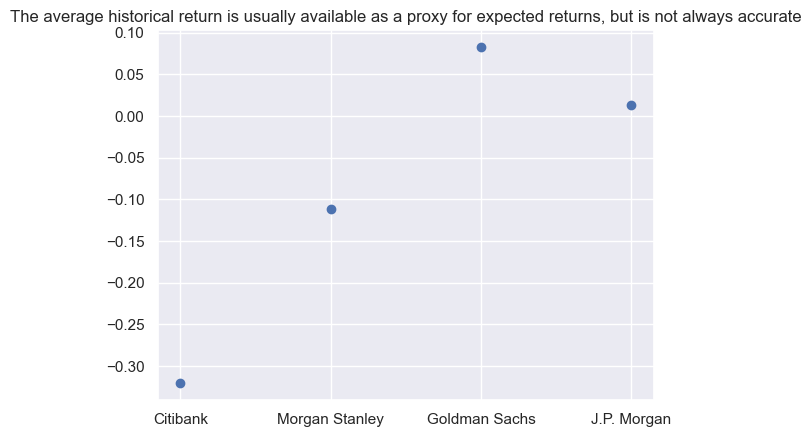

In [85]:
# Import the mean_historical_return method
from pypfopt.expected_returns import mean_historical_return

# Compute the annualized average historical return
mean_returns = mean_historical_return(prices, frequency=252) 

# Plot the annualized average historical return
plt.plot(mean_returns, linestyle = 'None', marker = 'o')
plt.title("The average historical return is usually available as a proxy for expected returns, but is not always accurate")
plt.show()

The **average historical return** is usually available as a ***proxy* for expected returns**, but is not always accurate--a more thorough estimate of expected returns **requires an assumption about the return _distribution_**, which we'll discuss in the context of Loss Distributions later in the course.

In [87]:
mean_returns

Citibank         -0.320429
Morgan Stanley   -0.111555
Goldman Sachs     0.082867
J.P. Morgan       0.013324
dtype: float64

This code calculates the annualized return (also called **Geometric mean return**) 

In [89]:
# Compute for Citibank just to check
citibank_returns = prices["Citibank"].pct_change().dropna(how="all")

(1 + citibank_returns).prod() ** (252 / citibank_returns.count()) - 1

-0.3204290900996566

Source code documentation: https://pyportfolioopt.readthedocs.io/en/latest/_modules/pypfopt/expected_returns.html#mean_historical_return

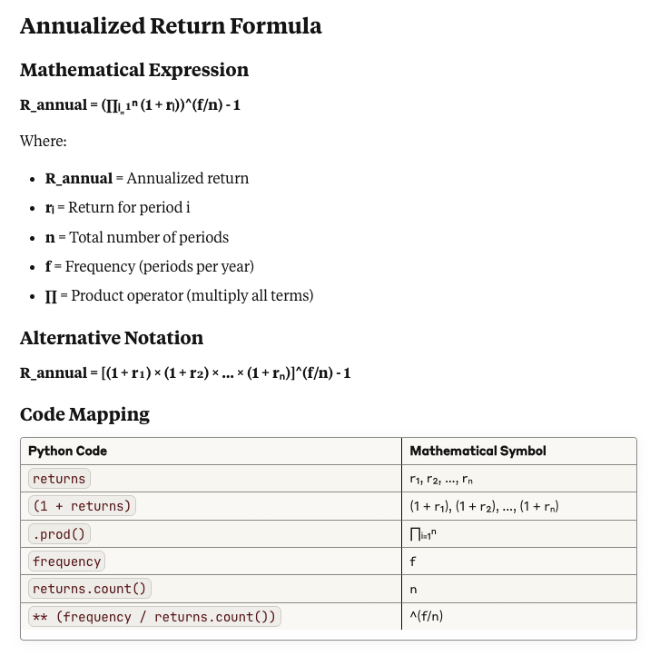

In [91]:
# Geometric mean return formula that `mean_historical_return` codes
show_video_slides(images=["annualized_return_formula"], right=1, bottom=-0.5)

The **average historical return** is usually available as a ***proxy* for expected returns**, but is not always accurate--a more thorough estimate of expected returns **requires an assumption about the return _distribution_**, which we'll discuss in the context of Loss Distributions later in the course.

### Practice with PyPortfolioOpt: Covariance (shrinkage)

Covariance and Covariance shrinkage --> some documentation: 
- Covariance estimation: https://scikit-learn.org/stable/modules/covariance.html#shrunk-covariance
- Shrinkage covariance estimation - LedoitWolf vs OAS and max-likelihood: https://scikit-learn.org/stable/auto_examples/covariance/plot_covariance_estimation.html
- pypfopt documentation: https://pyportfolioopt.readthedocs.io/en/latest/RiskModels.html
- intuition behind - "Honey, I Shrunk the Sample Covariance Matrix": http://www.ledoit.net/honey.pdf

Portfolio optimization relies upon an unbiased and efficient estimate of **asset covariance**. Although sample covariance is unbiased, it is not efficient--extreme events tend to be overweighted.

One approach to alleviate this is through "covariance shrinkage", where large errors are reduced ('shrunk') to improve efficiency. In this exercise, you'll use `pypfopt.risk_models`'s `CovarianceShrinkage` object to transform sample covariance into an efficient estimate. The textbook error shrinkage method, `.ledoit_wolf()`, is a method of this object.

Note that although the `CovarianceShrinkage` object takes prices as input, it actually calculates the covariance matrix of asset **returns**, not prices.

In [96]:
# Import the CovarianceShrinkage object
from pypfopt.risk_models import CovarianceShrinkage

# Create the CovarianceShrinkage instance variable
cs = CovarianceShrinkage(prices)
cs

In [97]:
# Compute the annualized sample covariance matrix of returns
sample_cov = prices.pct_change().cov() * 252

# Compute the efficient covariance matrix of returns
e_cov = cs.ledoit_wolf()

# Display both the sample covariance_matrix and the efficient e_cov estimate
print("Sample Covariance Matrix\n")
display(sample_cov)
print("\n")
print("Efficient Covariance Matrix\n")
display(e_cov)

Sample Covariance Matrix



,Citibank,Morgan Stanley,Goldman Sachs,J.P. Morgan
Citibank,0.536214,0.305045,0.217993,0.269784
Morgan Stanley,0.305045,0.491993,0.258625,0.218310
Goldman Sachs,0.217993,0.258625,0.217686,0.170937
J.P. Morgan,0.269784,0.218310,0.170937,0.264315




Efficient Covariance Matrix



,Citibank,Morgan Stanley,Goldman Sachs,J.P. Morgan
Citibank,0.527505,0.288782,0.206371,0.255401
Morgan Stanley,0.288782,0.485642,0.244837,0.206671
Goldman Sachs,0.206371,0.244837,0.225959,0.161823
J.P. Morgan,0.255401,0.206671,0.161823,0.270102


Although the differences between the sample covariance and the efficient covariance (found by shrinking errors) may seem small, they have a **huge impact on estimation of the optimal portfolio weights** and the generation of the **efficient frontier**. Practitioners generally use some form of efficient covariance for Modern Portfolio Theory.

### Breaking down the financial crisis

In the video you saw the efficient frontier for the portfolio of investment banks over the entire period 2005 - 2010, which includes time before, during and after the global financial crisis.

Here you'll break down this period into three sub-periods, or epochs: **2005-2006** (before), **2007-2008** (during) and **2009-2010** (after). For each period you'll compute the **efficient covariance matrix**, and compare them to each other.

The portfolio's prices for 2005 - 2010 are available in your workspace, as is the CovarianceShrinkage object from PyPortfolioOpt.

In [101]:
# Create a dictionary of time periods (or 'epochs')
epochs = { 'before' : {'start': '1-1-2005', 'end': '31-12-2006'},
           'during' : {'start': '1-1-2007', 'end': '31-12-2008'},
           'after'  : {'start': '1-1-2009', 'end': '31-12-2010'}
         }

# Compute the efficient covariance for each epoch
e_cov = {}
for x in epochs.keys():
  sub_price = prices.loc[epochs[x]['start']:epochs[x]['end']]
  e_cov[x] = CovarianceShrinkage(sub_price).ledoit_wolf()

# Display the efficient covariance matrices for all epochs
print("Efficient Covariance Matrices\n")
display(e_cov)


Efficient Covariance Matrices



{'before':                 Citibank  Morgan Stanley  Goldman Sachs  J.P. Morgan
 Citibank        0.018149        0.013789       0.013183     0.013523
 Morgan Stanley  0.013789        0.043021       0.030559     0.016525
 Goldman Sachs   0.013183        0.030559       0.044482     0.018237
 J.P. Morgan     0.013523        0.016525       0.018237     0.024182,
 'during':                 Citibank  Morgan Stanley  Goldman Sachs  J.P. Morgan
 Citibank        0.713035        0.465336       0.323977     0.364848
 Morgan Stanley  0.465336        0.994390       0.434874     0.298613
 Goldman Sachs   0.323977        0.434874       0.408773     0.224668
 J.P. Morgan     0.364848        0.298613       0.224668     0.422516,
 'after':                 Citibank  Morgan Stanley  Goldman Sachs  J.P. Morgan
 Citibank        0.841156        0.344939       0.252684     0.356788
 Morgan Stanley  0.344939        0.388839       0.231624     0.279727
 Goldman Sachs   0.252684        0.231624       0.244539   

The breakdown of the 2005 - 2010 period into sub-periods shows how the portfolio's risk increased during the crisis, and this changed the risk-return trade-off after the crisis. 

### The efficient frontier and the financial crisis

Previously you examined the covariance matrix of the investment bank portfolio before, during and after the financial crisis. Now you will visualize the changes that took place in the efficient frontier, showing how the crisis created a much higher baseline risk for any given return.

Using the PyPortfolioOpt `pypfopt` library's Critical Line Algorithm (`CLA`) object, you will derive and visualize the efficient frontier during the crisis period, and add it to a scatterplot already displaying the efficient frontiers before and after the crisis.

Expected returns `returns_during` and the efficient covariance matrix `ecov_during` are available, as is the CLA object from pypfopt. (Remember that DataCamp plots can be expanded to their own window, which can increase readability.)

In [105]:
# compute ecov_during
ecov_during = e_cov['during']

# compute returns_during
returns_during = mean_historical_return(prices['1-1-2007':'31-12-2008'], frequency=252) 

OrderedDict([('Citibank', 0.0), ('Morgan Stanley', 0.0), ('Goldman Sachs', 0.5179899476599341), ('J.P. Morgan', 0.48201005234006594)])


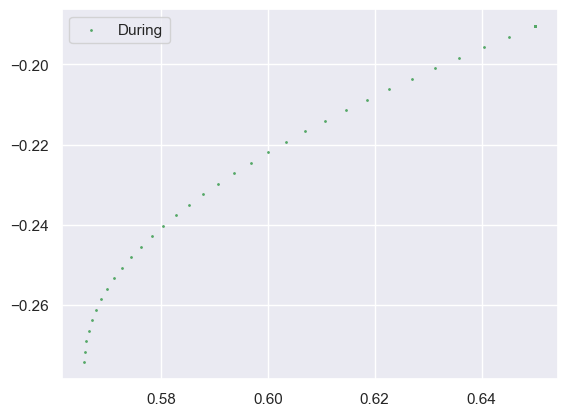

In [106]:
from pypfopt import CLA

# Initialize the Crtical Line Algorithm object
efficient_portfolio_during = CLA(returns_during, ecov_during)

# Find the minimum volatility portfolio weights and display them
print(efficient_portfolio_during.min_volatility())

# Compute the efficient frontier
(ret, vol, weights) = efficient_portfolio_during.efficient_frontier()

# Add the frontier to the plot showing the 'before' and 'after' frontiers
plt.scatter(vol, ret, s = 4, c = 'g', marker = '.', label = 'During')
plt.legend()
plt.show()

OrderedDict([('Citibank', 0.6576533711967371), ('Morgan Stanley', 0.048005986722123556), ('Goldman Sachs', 0.04037747136308688), ('J.P. Morgan', 0.2539631707180526)])
OrderedDict([('Citibank', 0.0), ('Morgan Stanley', 0.0), ('Goldman Sachs', 0.5179899476599341), ('J.P. Morgan', 0.48201005234006594)])
OrderedDict([('Citibank', 0.0), ('Morgan Stanley', 0.03433184205981618), ('Goldman Sachs', 0.8630043657391515), ('J.P. Morgan', 0.10266379220103235)])


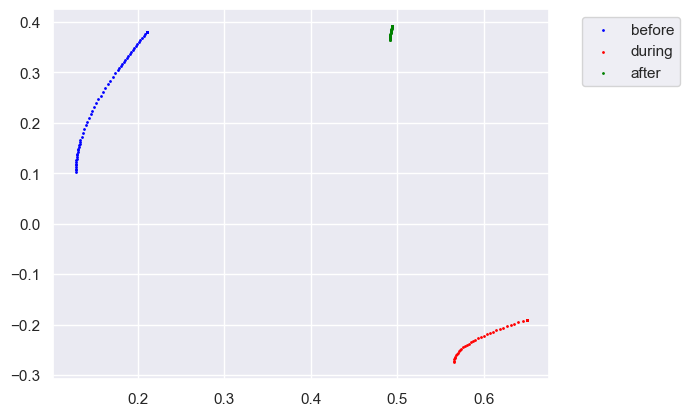

In [305]:
from pypfopt import CLA

for i in ['before', 'during', 'after']:
    returns_i = mean_historical_return(prices[list(epochs[i].values())[0]:list(epochs[i].values())[1]], frequency=252)
    ecov_i = e_cov[i]
    # Initialize the Crtical Line Algorithm object
    efficient_portfolio_i = CLA(returns_i, ecov_i)
    # Find the minimum volatility portfolio weights and display them
    print(efficient_portfolio_i.min_volatility())
    # Compute the efficient frontier
    (ret, vol, weights) = efficient_portfolio_i.efficient_frontier()
    # colors
    if i == 'before':
        color = 'blue'
    elif i == 'during':
        color = 'red'
    else:
        color = 'green'
    # Add the frontier to the plot showing the 'before' and 'after' frontiers
    plt.scatter(vol, ret, s = 4, c = color, marker = '.', label = i)

# show
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

# 2) Goal-oriented risk management

Now it’s time to expand your portfolio optimization toolkit with risk measures such as Value at Risk (VaR) and Conditional Value at Risk (CVaR). To do this you will use specialized Python libraries including pandas, scipy, and pypfopt. You’ll also learn how to mitigate risk exposure using the Black-Scholes model to hedge an options portfolio.

## 2.1) Measuring Risk

In [111]:
# vídeo
# How to measure risk?

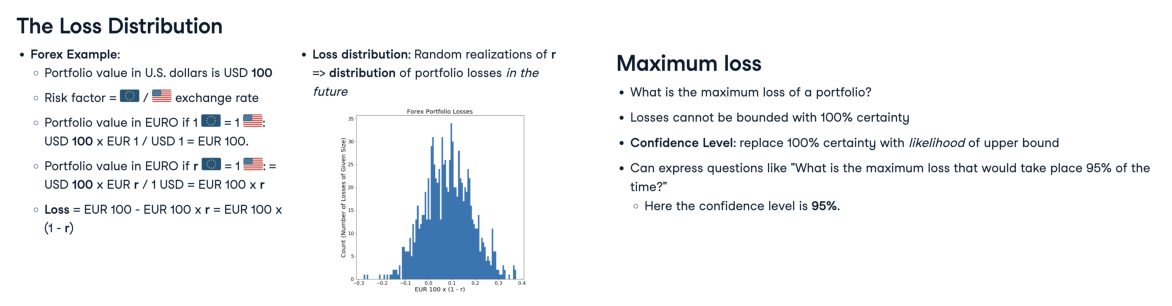

In [112]:
show_video_slides(['loss_distribution', 'maximum_loss'], wspace=0.1)

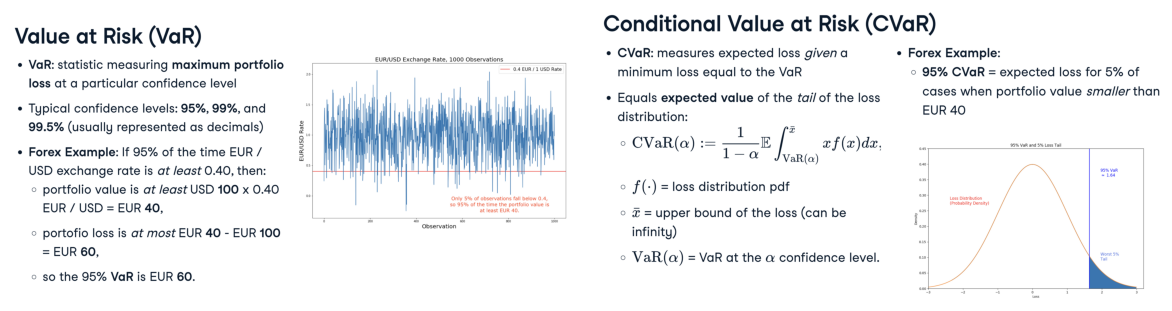

In [113]:
show_video_slides(['VaR', 'CVaR'], wspace=0.05)

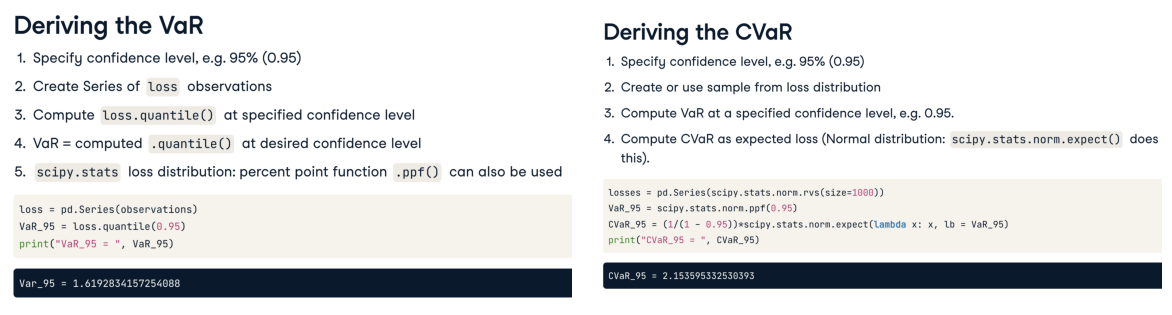

In [114]:
show_video_slides(['deriving_var', 'deriving_cvar'], wspace=0.05)

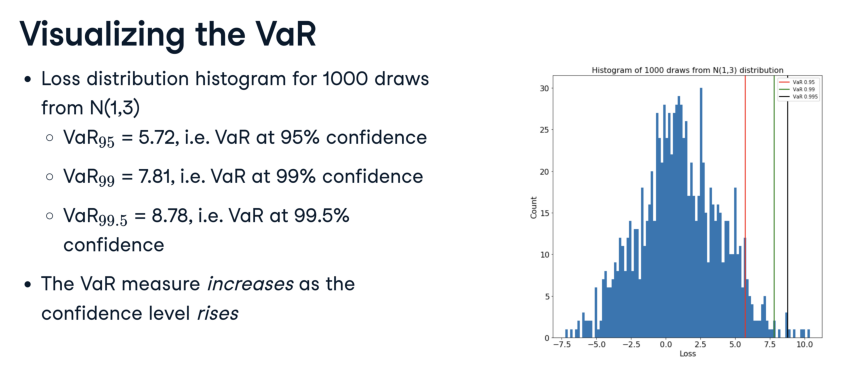

In [115]:
show_video_slides(['visualizing_var'], right=1.3, bottom=0)

### VaR for the Normal distribution

To get accustomed to the Value at Risk (VaR) measure, it helps to apply it to a known distribution. The Normal (or Gaussian) distribution is especially appealing as it 
- 1) has an analytically simple form, and
-  2) represents a wide variety of empirical phenomena.

For this exercise **you'll assume that the loss of a portfolio is normally distributed**, i.e., the higher the value drawn from the distribution, the higher the loss.

You'll learn how to apply both `scipy.stats.norm`'s `ppf()` (percent point function) and numpy's `quantile()` function to find the VaR at the 95% and 99% confidence levels, respectively, for a standard Normal distribution. You'll also visualize the VaR as a threshold on a Normal distribution plot.

95% VaR:  1.644853626951472 ; 99% VaR:  2.3368671421625042


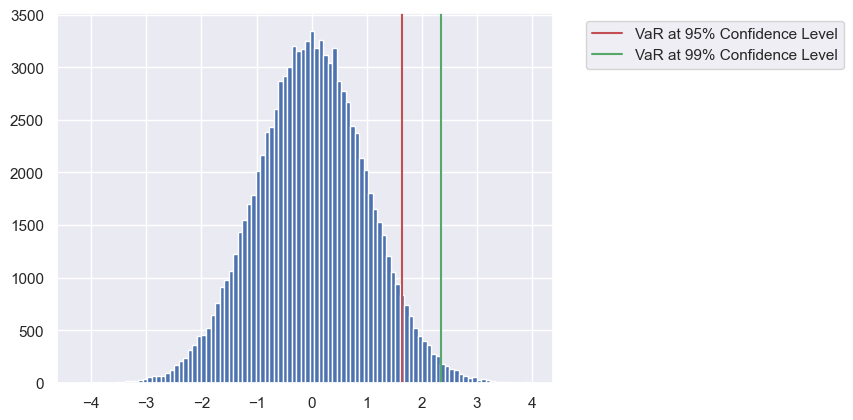

In [382]:
from scipy.stats import norm

# Create the VaR measure at the 95% confidence level using norm.ppf()
VaR_95 = norm.ppf(0.95)

# Create the VaR measure at the 99% confidence level using numpy.quantile()
draws = norm.rvs(size = 100000)
VaR_99 = np.quantile(draws, 0.99)
# VaR_95 = np.quantile(draws, 0.95) # different than norm.ppf(0.95)

# Compare the 95% and 99% VaR
print("95% VaR: ", VaR_95, "; 99% VaR: ", VaR_99)

# Plot the normal distribution histogram and 95% VaR measure
plt.hist(draws, bins = 100)
plt.axvline(x = VaR_95, c='r', label = "VaR at 95% Confidence Level")
plt.axvline(x = VaR_99, c='g', label = "VaR at 99% Confidence Level")

# show
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

As your plot shows, the 95% VaR is about 1.65, which is the maximum loss that is expected to occur 95% of the time. You've also used both the inverse cumulative density function (the percent point function) and the quantile function to find the VaR.

### Comparing CVaR and VaR

The conditional value at risk (CVaR), or expected shortfall (ES), asks what the average loss will be, conditional upon losses exceeding some threshold at a certain confidence level. It uses VaR as a point of departure, but contains more information because it takes into consideration the tail of the loss distribution.

You'll first compute the 95% VaR for a Normal distribution of portfolio losses, with the same mean and standard deviation as the 2005-2010 investment bank portfolio_losses. You'll then use the VaR to compute the 95% CVaR, and plot both against the Normal distribution.

The portfolio_losses are available in your workspace, as well as the norm Normal distribution from scipy.stats.

In [372]:
# load data
portfolio = pd.read_csv(data_folder + "crisis_portfolio.csv", index_col=0)
# compute portfolio_losses
portfolio_losses = -portfolio.pct_change().dot([0.25, 0.25, 0.25, 0.25])
portfolio_losses

Date
31/12/2004         NaN
03/01/2005   -0.005262
04/01/2005    0.011152
05/01/2005   -0.001081
06/01/2005   -0.013209
                ...   
23/12/2010    0.005974
27/12/2010   -0.012551
28/12/2010   -0.000594
29/12/2010    0.007729
30/12/2010    0.000818
Length: 1511, dtype: float64

In [386]:
(1 / (1 - 0.95))

19.999999999999982

VaR_95: 0.05397
CVaR_95: 0.06776


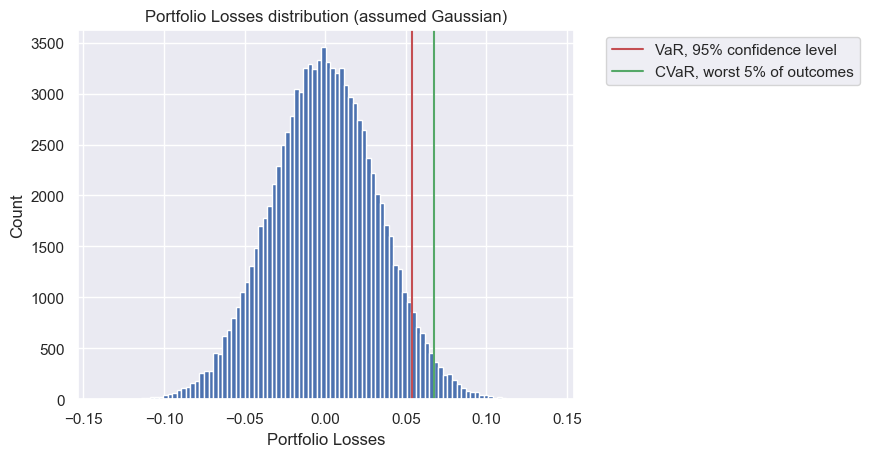

In [400]:
# Compute the mean and standard deviation of the portfolio returns
pm = portfolio_losses.mean()
ps = portfolio_losses.std()

# Compute the 95% VaR using the .ppf()
VaR_95 = norm.ppf(0.95, loc=pm, scale=ps)
print("VaR_95:", round(VaR_95, 5))

# Compute the expected tail loss and the CVaR in the worst 5% of cases
tail_loss = norm.expect(lambda x: x, loc=pm, scale=ps, lb=VaR_95)
CVaR_95 = (1 / (1 - 0.95)) * tail_loss
print("CVaR_95:", round(CVaR_95, 5))

# Plot the normal distribution histogram and add lines for the VaR and CVaR
plt.hist(norm.rvs(size = 100000, loc = pm, scale = ps), bins = 100)
plt.axvline(x = VaR_95, c='r', label = "VaR, 95% confidence level")
plt.axvline(x = CVaR_95, c='g', label = "CVaR, worst 5% of outcomes")

# show
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.xlabel("Portfolio Losses")
plt.ylabel("Count")
plt.title("Portfolio Losses distribution (assumed Gaussian)")
plt.show()

The CVaR is a richer measure of risk than the VaR, but can be more difficult to compute when the distribution of losses (or returns) is unknown, or is more complicated than a Normal distribution. Nevertheless, both measures are used in risk management to identify 'danger signs' when portfolio losses approach the VaR or CVaR threshold.

### Which risk measure is "better"?

Although VaR and CVaR are similar, it's generally the case that CVaR is the preferred risk measure for risk management. One reason is that it is affected by the tail of the loss distribution, while VaR is a static value.

Question: How does CVaR incorporate information from the tail of the loss distribution?

Answer: *CVaR is an expected value over all of the losses exceeding the VaR, which are precisely the tail.*

## 2.2) Risk exposure and Loss

## 2.3) Risk management using VaR & CVaR

## 2.4) Portfolio hedging: offsetting risk

# 3) Estimating and identifying risk

In this chapter, you’ll estimate risk measures using parametric estimation and historical real-world data. You'll then discover how Monte Carlo simulation can help you predict uncertainty. Lastly, you’ll learn how the global financial crisis signaled that randomness itself was changing, by understanding structural breaks and how to identify them.


## 3.1) Parametric Estimation

## 3.2) Historical and Monte Carlo Simulation

## 3.3) Structural breaks

## 3.4) Volatility and extreme values

# 4) Advanced risk management

It's time to explore more general risk management tools. These advanced techniques are pivotal when attempting to understand extreme events, such as losses incurred during the financial crisis, and complicated loss distributions which may defy traditional estimation techniques. You’ll also discover how neural networks can be implemented to approximate loss distributions and conduct real-time portfolio optimization.

## 4.1) Extreme value theory

## 4.2) Kernel Density Estimation

## 4.3) Neural Network risk management